In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_scores = pd.read_csv('train_scores.csv')
val_scores = pd.read_csv('val_scores.csv')

In [3]:
train_acc = train_scores['accuracy']
val_acc = val_scores['accuracy']

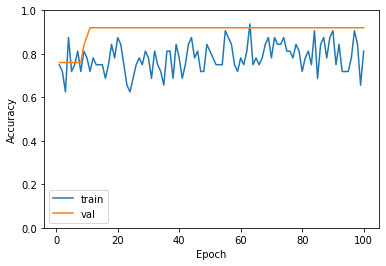

In [19]:
plt.plot(range(1,101), train_acc)
plt.plot(range(1,101), val_acc)
plt.legend(['train', 'val'])
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [15]:
val_scores

,Unnamed: 0,AP,AUC,accuracy,mean_precision,mean_recall,precision_mel,sensitivity,specificity,epoch
0,0,0.814402,0.578947,0.76,0.380000,0.500000,0.760000,1.0,0.000000,1.0
1,1,0.830364,0.666667,0.76,0.380000,0.500000,0.760000,1.0,0.000000,2.0
2,2,0.899746,0.771930,0.76,0.380000,0.500000,0.760000,1.0,0.000000,3.0
3,3,0.920864,0.798246,0.76,0.380000,0.500000,0.760000,1.0,0.000000,4.0
4,4,0.913804,0.807018,0.76,0.380000,0.500000,0.760000,1.0,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...
95,95,0.969098,0.912281,0.92,0.952381,0.833333,0.904762,1.0,0.666667,96.0
96,96,0.969098,0.912281,0.92,0.952381,0.833333,0.904762,1.0,0.666667,97.0
97,97,0.969098,0.912281,0.92,0.952381,0.833333,0.904762,1.0,0.666667,98.0
98,98,0.969098,0.912281,0.92,0.952381,0.833333,0.904762,1.0,0.666667,99.0


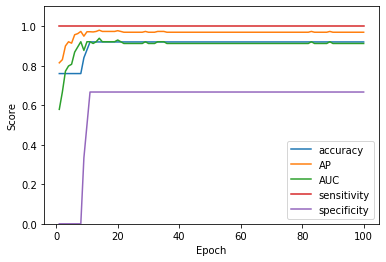

In [18]:
# plt.figure(figsize=(10,6))
plt.plot(range(1,101), val_scores['accuracy'])
plt.plot(range(1,101), val_scores['AP'])
plt.plot(range(1,101), val_scores['AUC'])
plt.plot(range(1,101), val_scores['sensitivity'])
plt.plot(range(1,101), val_scores['specificity'])
plt.legend(['accuracy', 'AP', 'AUC', 'sensitivity', 'specificity'])
plt.ylim([0, 1.1])
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

In [21]:
y_preds = pd.read_csv('val_results.csv', header=None)
val = pd.read_csv('val.csv', header=None)
y_true = val[2]

In [22]:
from sklearn.metrics import roc_curve

In [23]:
y_preds.shape

(25, 2)

In [25]:
y_true

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: 2, dtype: int64

In [24]:
y_preds[1]

0     0.428191
1     0.466570
2     0.616853
3     0.553138
4     0.477987
5     0.465729
6     0.698556
7     0.679225
8     0.714401
9     0.661047
10    0.597592
11    0.592233
12    0.560620
13    0.672611
14    0.613050
15    0.610986
16    0.506597
17    0.648334
18    0.707100
19    0.687541
20    0.610388
21    0.543137
22    0.621455
23    0.711828
24    0.663954
Name: 1, dtype: float64

In [16]:
fpr, tpr, thresholds = roc_curve(y_true, y_preds[1], pos_label=1)

In [20]:
fpr

array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
       0.33333333, 0.33333333, 1.        ])

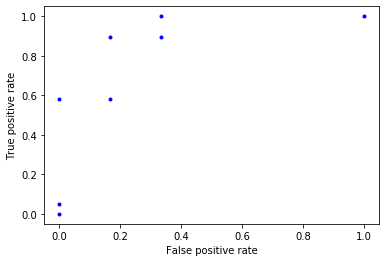

In [26]:
plt.plot(fpr, tpr, 'b.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()